# Proceso de QA para evaluar "prompts" y sus respuestas versus respuesta esperada

## Segunda parte: Evaluación de respuestas

El objetivo de esta sección es evaluar las respuestas generadas por distintos prompts.

__Requisitos:__ Importamos las siguientes librerías

In [1]:
import sys
sys.path.append('../lib')

import qagenevaluation as qaeval
import qagraphutils as qagraph

__Paso 1:__ Seleccionamos algunos archivos para evaluar

En nuestro caso seleccionaremos: _People_Argentina_2years_v0_2.json_ que contiene respuestas generadas por un prompt complejo y un prompt sencillo. Revisar la primera parte para mayores detalles

In [2]:
filename_to_eval = "People_Argentina_2years_v0_2.json"

__Paso 2:__ Procedemos a genera la evaluación usando solamente Azure Open AI para mayores detalles revisar qaoaievalutils

Notar que estamos generando dicha evaluación como un json con nombre: _People_Argentina_2years_evaluation_simple_vs_complex_

In [4]:
qaeval.evaluate_responses(filename_to_eval=filename_to_eval,
                                   response_a_field="simple_robot",
                                   response_b_field="complex_robot", 
                                   filename_result="People_Argentina_2years_evaluation_simple_vs_complex.json")

'People_Argentina_2years_evaluation_simple_vs_complex.json'

Si quisieramos ver el resultado en este mismo notebook podemos usar printResult=True

In [6]:
eval_result = qaeval.evaluate_responses(filename_to_eval=filename_to_eval,
                          response_a_field="simple_robot",
                          response_b_field="complex_robot", 
                          filename_result="People_Argentina_2years_evaluation_simple_vs_complex_show.json",
                          printResult=True)

{'used_templates': [{'complex_robot': "Responde la pregunta delimitada por ###Question###. \nTu respuesta debe ser en español informal.\nPara responder toma en cuenta las siguientes recomendaciones: \nRecomendación 1 : Utiliza los datos del usuario delimitados por ###user_data## para complementar tu respuesta.\nRecomendación 2 : Usa el 'Nombre' de los datos del usuario para referirte al usuario en tu respuesta por su nombre.\nRecomendación 3 : Usa la 'Ubicación' de los datos del usuario para filtrar tu respuesta usando la ubicación del usuario.\n###user_data###\nNombre: Alfonso Xochipa \nAntigüedad: 2 años \nRol: Software developer\nUbicación: Argentina \n###user_data###\n###Question### {user_question} ###Question###"}, {'simple_robot': 'Responde la pregunta delimitada por ###Question###. Tu respuesta debe ser en español informal.\n###Question### {user_question} ###Question###'}], 'questions_answers': [{'id_question': '1', 'question': '¿Cuáles son las ventajas de trabajar en Baufest?',

Para una mejor visualización se puede usar un [json viewer](https://codebeautify.org/jsonviewer#)

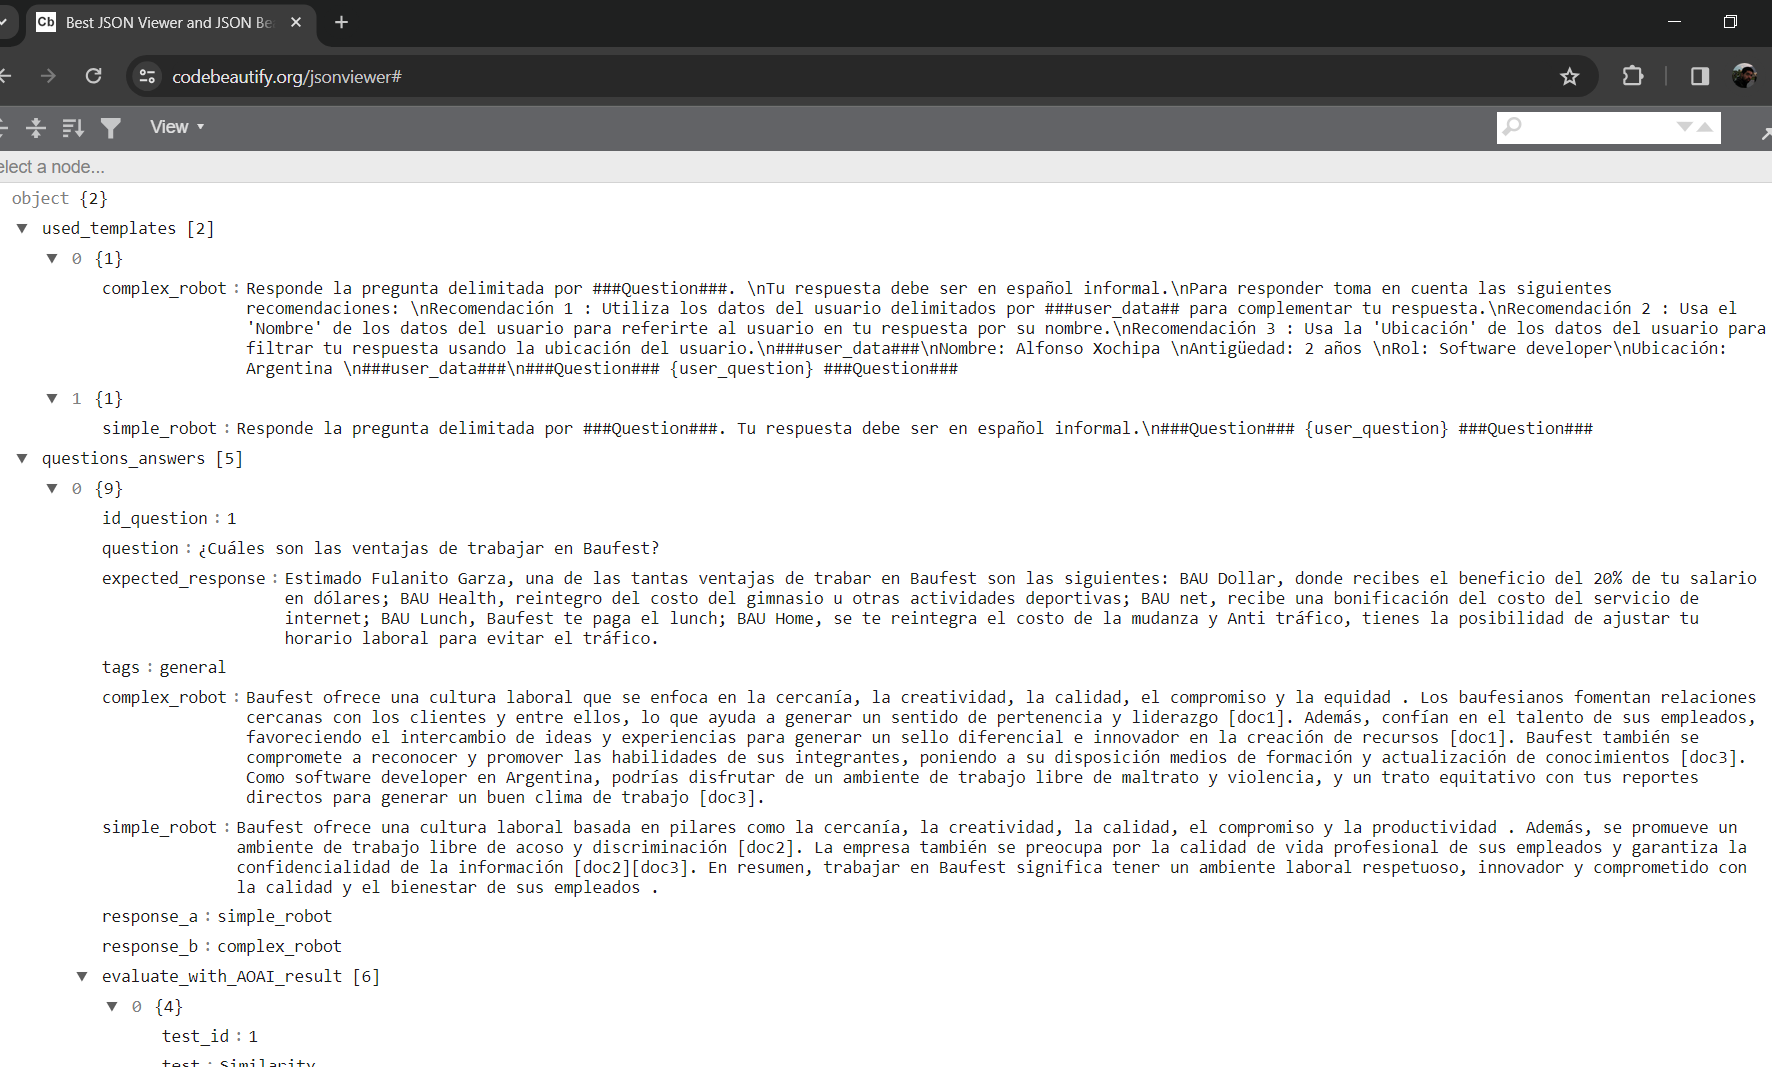

También podemos usar una utilidad que nos muestra una gráfica de barras para 5 de las 6 pruebas: Similaridad, Correctividad y Calificación

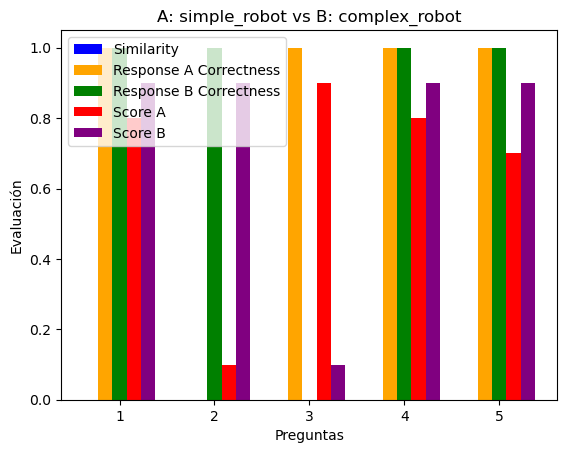

In [7]:
qagraph.show_evaluate_responses_as_bar_graph(filename_to_eval=eval_result)